In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("Banten.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  365 non-null    datetime64[ns]
 1   Tn       358 non-null    float64       
 2   Tx       364 non-null    float64       
 3   Tavg     364 non-null    float64       
 4   RH_avg   364 non-null    float64       
 5   RR       351 non-null    float64       
 6   ss       364 non-null    float64       
 7   ff_x     364 non-null    float64       
 8   ddd_x    364 non-null    float64       
 9   ff_avg   364 non-null    float64       
 10  ddd_car  364 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 31.5+ KB


<ipython-input-2-4b822b2eadf6>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [3]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,23.0,28.7,6.8,26.0
1,2023-02-01,24.8,31.2,2.2,27.7
2,2023-03-01,25.1,30.0,0.3,26.7
3,2023-04-01,24.4,32.4,3.6,26.4
4,2023-05-01,24.0,33.6,8.2,27.4
...,...,...,...,...,...
360,2023-12-16,24.4,34.6,0.0,29.2
361,2023-12-17,24.0,34.4,0.0,29.2
362,2023-12-18,NaN,35.6,0.0,29.5
363,2023-12-19,NaN,35.8,0.0,28.8


In [4]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

22

In [5]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [6]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [7]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,23.0,28.7,6.8,26.0
1,31,31,2023-01-02,24.8,30.8,8.6,27.3
2,59,60,2023-01-03,23.6,29.2,1.8,25.8
3,90,92,2023-01-04,23.9,32.7,24.0,25.5
4,120,123,2023-01-05,24.1,33.6,0.0,28.6
...,...,...,...,...,...,...,...
349,349,360,2023-12-16,24.4,34.6,0.0,29.2
350,350,361,2023-12-17,24.0,34.4,0.0,29.2
351,351,362,2023-12-18,NaN,35.6,0.0,29.5
352,352,363,2023-12-19,NaN,35.8,0.0,28.8


In [8]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn          7
Tx          1
RR         14
Tavg        1
dtype: int64

In [9]:
# isi yang null
mrr = df1['RR'].mean()
ma = df1['Tavg'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       1
dtype: int64

In [10]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

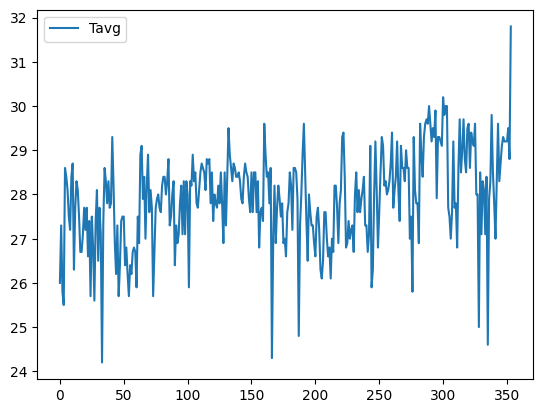

In [11]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

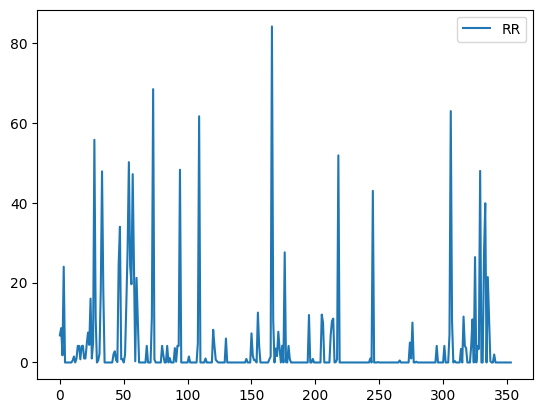

In [12]:
#plotting RR
df1[['RR']].plot()

In [13]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,23.00000,28.7,6.8,26.0,30.8,27.3,8.6
1,31,31,2023-01-02,24.80000,30.8,8.6,27.3,29.2,25.8,1.8
2,59,60,2023-01-03,23.60000,29.2,1.8,25.8,32.7,25.5,24.0
3,90,92,2023-01-04,23.90000,32.7,24.0,25.5,33.6,28.6,0.0
4,120,123,2023-01-05,24.10000,33.6,0.0,28.6,34.3,28.4,0.0
...,...,...,...,...,...,...,...,...,...,...
349,349,360,2023-12-16,24.40000,34.6,0.0,29.2,34.4,29.2,0.0
350,350,361,2023-12-17,24.00000,34.4,0.0,29.2,35.6,29.5,0.0
351,351,362,2023-12-18,24.07464,35.6,0.0,29.5,35.8,28.8,0.0
352,352,363,2023-12-19,24.07464,35.8,0.0,28.8,35.7,31.8,0.0


In [14]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,6.8,26.0,27.3,8.6
1,8.6,27.3,25.8,1.8
2,1.8,25.8,25.5,24.0
3,24.0,25.5,28.6,0.0
4,0.0,28.6,28.4,0.0
...,...,...,...,...
349,0.0,29.2,29.2,0.0
350,0.0,29.2,29.5,0.0
351,0.0,29.5,28.8,0.0
352,0.0,28.8,31.8,0.0


In [15]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,6.8,26.0,27.3,8.6
1,8.6,27.3,25.8,1.8
2,1.8,25.8,25.5,24.0
3,24.0,25.5,28.6,0.0
4,0.0,28.6,28.4,0.0
...,...,...,...,...
348,0.0,29.2,29.2,0.0
349,0.0,29.2,29.2,0.0
350,0.0,29.2,29.5,0.0
351,0.0,29.5,28.8,0.0


In [16]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,6.8,26.0,27.3,8.6,0
1,8.6,27.3,25.8,1.8,1
2,1.8,25.8,25.5,24.0,2
3,24.0,25.5,28.6,0.0,3
4,0.0,28.6,28.4,0.0,4
...,...,...,...,...,...
348,0.0,29.2,29.2,0.0,348
349,0.0,29.2,29.2,0.0,349
350,0.0,29.2,29.5,0.0,350
351,0.0,29.5,28.8,0.0,351


In [18]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [19]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [20]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
X_test

,Indeks,Tavg
282,282,29.6
283,283,28.9
284,284,28.4
285,285,29.3
286,286,29.6
...,...,...
348,348,29.2
349,349,29.2
350,350,29.2
351,351,29.5


In [22]:
#testing
pred1 = lr.predict(X_test)
pred1

array([28.59682811, 28.34870512, 28.17188846, 28.49421607, 28.60262471,
       28.63972703, 28.60552301, 28.74958481, 28.60842131, 28.46725782,
       28.57566645, 28.50580928, 28.7211774 , 28.01501733, 28.51015673,
       28.51160588, 28.47740187, 28.44319786, 28.8368318 , 28.6956683 ,
       28.76842377, 28.76987292, 27.95129933, 27.88144216, 27.7046255 ,
       27.91999362, 28.49189337, 27.95854509, 27.9956474 , 27.64056493,
       28.283771  , 28.67740494, 28.25101614, 28.4307311 , 28.68175239,
       28.36232308, 28.25681274, 28.61479352, 28.65189583, 28.29681336,
       28.58348781, 28.51363063, 28.47942662, 28.65914158, 28.09014013,
       28.09158929, 27.02344356, 28.2727534 , 27.77505827, 28.20434537,
       28.1344882 , 27.77940573, 28.24434599, 26.89097496, 28.06897848,
       28.21304028, 28.74928687, 28.2872449 , 28.03912192, 27.75534577,
       28.22028603, 28.68522629, 28.22318433, 28.36724613, 28.51130793,
       28.58406341, 28.5498594 , 28.55130855, 28.5527577 , 28.66

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

0.9051555995212236 1.2664204935322514


In [24]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,29.6
283,283,28.9
284,284,28.4
285,285,29.3
286,286,29.6
...,...,...
348,348,29.2
349,349,29.2
350,350,29.2
351,351,29.5


In [25]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,28.596828
283,28.348705
284,28.171888
285,28.494216
286,28.602625
...,...
348,28.549859
349,28.551309
350,28.552758


In [26]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-26-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,26.0,NaN
1,27.3,NaN
2,25.8,NaN
3,25.5,NaN
4,28.6,NaN
...,...,...
348,29.2,28.549859
349,29.2,28.551309
350,29.2,28.552758
351,29.5,28.661166


<Axes: >

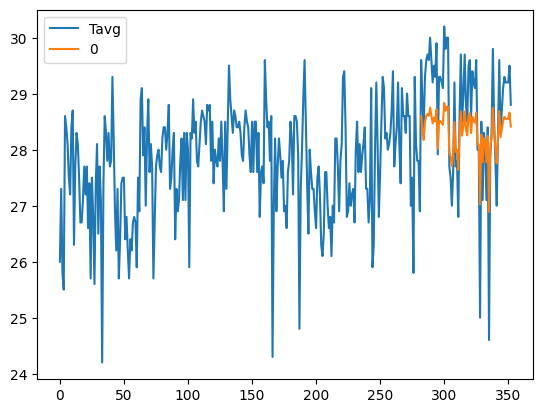

In [27]:
kan.plot()

In [28]:
new_data = [[354,28.8],[355,28.8],[356,28.8],[357,28.8],[358,28.8],[359,28.8],[360,28.8]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([28.41594165, 28.4173908 , 28.41883995, 28.4202891 , 28.42173825,
       28.4231874 , 28.42463655])

In [29]:
kan.to_json('Prediksi Banten.json')